# Réseaux de neurones

## Introduction aux données

- Visualiser les données en utilisant la méthode hist() sur notre DataFrame iris et afficher les graphiques.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

# Lire le dataset
iris = pd.read_csv('iris.csv')

# Mélanger les lignes
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

     sepal_length  sepal_width  petal_length  petal_width     species
14            5.8          4.0           1.2          0.2      setosa
98            5.1          2.5           3.0          1.1  versicolor
75            6.6          3.0           4.4          1.4  versicolor
16            5.4          3.9           1.3          0.4      setosa
131           7.9          3.8           6.4          2.0   virginica


In [2]:
# il y a 3 espèces
print(iris.species.unique())

['setosa' 'versicolor' 'virginica']


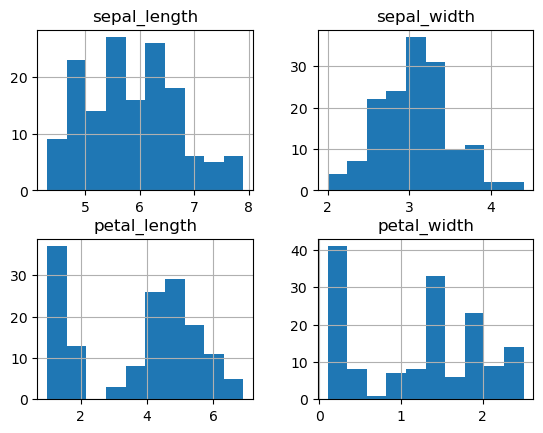

In [3]:
iris.hist()
plt.show()

## Neurones

- Ecrire une fonction nommée sigmoid_activation avec en paramètres x un vecteur caractéristiques et theta un vecteur paramètre de même longueur pour implémenter la fonction d'activation sigmoid.
 + Assigner la valeur de sigmoid_activation(x0, theta_init) à a1. a1 devrait être un vecteur.


In [7]:
# Variables pour tester la fonction sigmoid_activation
iris["ones"] = np.ones(iris.shape[0]) # on crée une colonne de 1 pour le biais
# Biais et les 4 caractéristiques
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
# 1 pour les iris de type versicolor et 0 pour toutes les autres
y = (iris.species == 'versicolor').values.astype(int) 

# la première observation
x0 = X[0]

# Initialiser les thetas aléatoirement
np.random.seed(1)
theta_init = np.random.normal(0,0.01,size=(5,1))

In [11]:
def sigmoid_activation(x, theta):
    x = np.asarray(x) # convertit une entrée en tableau array
    theta = np.asarray(theta)
    return 1 / (1 + np.exp(-np.dot(theta.T,x)))

a1 = sigmoid_activation(x0, theta_init)
print(a1)

[0.48712532]


## Fonction Cost

- Ecrire une fonction nommée singlecost(), qui peut calculer le coût à partir d'une seule observation.
 + Cette fonction doit utiliser en paramètre les caractéristiques X, les cibles y, et les paramètres theta pour calculer la fonction de coût.
 + Assigner le coût des variables x0, y0, et theta_init à la variable first_cost.

In [15]:
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'versicolor').values.astype(int)

# Premières observations des caractéristiques et cible
x0 = X[0]
y0 = y[0]

# Initialiser les paramètres, nous avons 4 caractéristiques et un biais et une seule couche
np.random.seed(1)
theta_init = np.random.normal(0,0.01,size=(5,1))

In [17]:
def singlecost(X,y,theta):
    # calculer l'activation
    h = sigmoid_activation(X.T, theta)
    
    # prendre la moyenne négative de la cible * log(activation)+(1 - cible)*log(1 - activation)
    cost = -np.mean(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

first_cost = singlecost(x0, y0, theta_init)
print(first_cost)

0.6677237568307639


## Calculer les gradients

- Calculer les gradients moyens à travers toutes les observations de X et des cibles correspondantes y avec les paramètres initiaux theta_init.
- Assigner les gradients moyens à la variable grads.


In [21]:
# Initialiser les paramètres
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'versicolor').values.astype(int)
np.random.seed(1)
theta_init = np.random.normal(0,0.01,size=(5,1))

# Stocker les mises à jours dans ce tableau array
grads = np.zeros(theta_init.shape)

# Nombre d'observations
n = X.shape[0]
print(n)

150


In [23]:
for j, obs in enumerate(X):
    # calculer l'activation
    h = sigmoid_activation(obs, theta_init)
    
    # obtenir le delta
    delta = (y[j]-h)*h*(1-h)*obs
    
    # on somme chacun de ces termes et on divise par le nombre d'observations
    grads += delta[:,np.newaxis]/X.shape[0]
print(grads)

[[-0.03753118]
 [-0.21073531]
 [-0.1387791 ]
 [-0.09740595]
 [-0.03372266]]


## Réseau de neurones à 2 couches

In [26]:
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'versicolor').values.astype(int)
np.random.seed(1)
theta_init = np.random.normal(0,0.01,size=(5,1))

In [28]:
# on fixe le taux d'apprentissage alpha
learning_rate = 0.1
# nombre max d'itérations pour le gradient descent
maxepochs = 10000
# seuil de convergence de coûts, par exemple (prevcost - cost) > convergence_thres
convergence_thres = 0.00001

def learn(X,y,theta,learning_rate,maxepochs,convergence_thres):
    costs = []
    cost = singlecost(X,y,theta) # calcul du coût initial
    costprev = cost + convergence_thres + 0.01 # fixe un coput initial à ne pas dépasser
    counter = 0 # ajoute un compteur
    # boucle jusqu'à la convergence
    for countrer in range(maxepochs):
        grads = np.zeros(theta.shape)
        for j,obs in enumerate(X):
            h = sigmoid_activation(obs,theta) # calcul de l'activation
            delta = (y[j]-h)*h*(1-h)*obs # calcul du delta
            grads += delta[:,np.newaxis]/X.shape[0] # moyenne des gradients
            
        # mise à jour des paramètres à partir des gradients
        theta += grads*learning_rate
        counter += 1 # compteur
        costprev = cost # stocke le précédent coput que l'on va comparer au nouveau
        cost = singlecost(X,y,theta) # calcul du nouveau coût
        costs.append(cost) # on ajout le coût au tableau costs
        if np.abs(costprev-cost)<convergence_thres: # on vérifie la convergence
            break # lorsque àa converge (par rapport au seuil défini) on arrête
            
    plt.plot(costs)
    plt.title("Convergence de la fonction Cost")
    plt.ylabel('J')
    plt.xlabel('Itération')
    plt.show()
    return theta

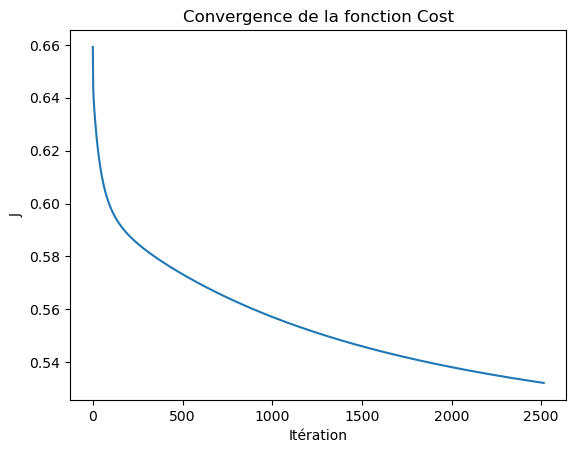

In [30]:
theta = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)

## Réseaux de neurones

- Ecrire une fonction nommée feedforward() qui prendra en paramètre X et 2 ensembles de paramètres theta0 et theta1 pour calculer la sortie hΘ(X).
 + Assigner la sortie à la variable h en utilisant les caractéristiques X et les paramètres theta0_init et theta1_init.


In [13]:
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
np.random.seed(1)
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

In [16]:
def feedforward(X,theta0,theta1):
    # on nourrit le réseau de neurones à partir de la première couche
    a1 = sigmoid_activation(X.T,theta0).T
    # on ajoute une colonne de 1 pour le biais
    a1 = np.column_stack([np.ones(a1.shape[0]),a1])
    # les unitéq d'activation sont ensuite imputées à la couche de sortie
    out = sigmoid_activation(a1.T,theta1)
    return out

h = feedforward(X,theta0_init,theta1_init)

## Fonction Cost pour un réseau de neurones multiple

- Ecrire une fonction nommée multiplecost() qui doit estimer la fonction de coût.
 + Utiliser les observations de X, les cibles y et les paramètres initiaux theta0_init et theta1_init en paramètre de la fonction.
 + Assigner la valeur de coût ou d'erreur à la variable c.


In [18]:
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'versicolor').values.astype(int)
np.random.seed(1)
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

In [19]:
def multiplecost(X,y,theta0,theta1):
    # nourrir le réseau de neurones
    h = feedforward(X,theta0,theta1)
    # calculer l'erreur
    inner = y*np.log(h)+(1-y)*np.log(1-h)
    # retourne la négation de l'erreur moyenne
    return -np.mean(inner)

c = multiplecost(X,y,theta0_init, theta1_init)
c

0.6941417093435182

## Backpropagation

In [21]:
# Utiliser une classe pour ce modèle, c'est une bonne pratique et permet de condenser le code
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, 
                 convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # on nourrit le réseau de neurones
        l1, l2 = self._feedforward(X) # on applique la fonction feedforward
        # on calcule l'erreur
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # négation de l'erreur moyenne
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # données de la première couche
        l1 = sigmoid_activation(X.T, self.theta0).T
        # on ajoute une colonne de 1 pour le terme de biais
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # les unités d'activation sont ensuite imputées à la couche de soprtie
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1 # fixe un coût initial à ne pas dépasser
        counter = 0 # initialise un compteur
        
        # Boucle jusqu'à la convergence
        for counter in range(self.maxepochs):
            # on nourrit le réseau
            l1, l2 = self._feedforward(X)
            
            # on démarre la backpropagation
            # Calcul des gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)
            
            # Update des paramètres par moyenne des gradients et en multipliant 
            # par le taux d'apprentissage
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Stockage des coûts et vérification de la convergence
            counter += 1 # décompte
            costprev = cost # Stockage du coût actuel dans prev cost
            cost = self._multiplecost(X, y) # on obtient le nouveau coût
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break

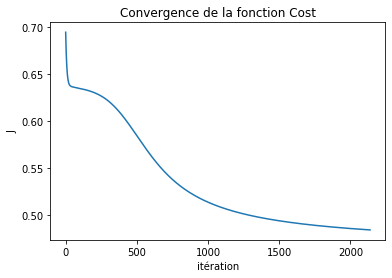

In [23]:
# on fixe un taux d'apprentissage
learning_rate = 0.5
# nombre d'itérations max pour le gradient descent
maxepochs = 10000
# seuil de convergence de coût, par exemple (prevcost - cost) > convergence_thres
convergence_thres = 0.00001
# nombre de neurones ou unités d'activation par couche cachée
hidden_units = 4

# initialisation du modèle
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs, 
              convergence_thres=convergence_thres, hidden_layer=hidden_units)
# entrainement du modèle
model.learn(X,y)

# tracé l'évolution des coûts ou de l'erreur
plt.plot(model.costs)
plt.title('Convergence de la fonction Cost')
plt.ylabel('J')
plt.xlabel('itération')
plt.show()

## Séparation des données

- Choisir les 100 premières lignes de X et y et les assigner respectivement aux variables X_train et y_train.
- Les 50 dernières lignes devront être assignées aux variables X_test et y_test.

In [24]:
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'versicolor').values.astype(int)

In [25]:
X_train = X[:100]
y_train = y[:100]

X_test = X[-50:]
y_test = y[-50:]

## Prédiction sur les fleurs d'iris

In [30]:
# fixer un taux d'apprentissage
learning_rate = 0.5
# Nombre maximum d'itérations pour le gradient descent
maxepochs = 10000
# seuil de convergence des coûts, par exemple (prevcost - cost) > convergence_thres
convergence_thres = 0.00001
# Nombre de neurones par couche cachée
hidden_units = 4

# Initialiser le modèle
model = NNet3(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)

# predict()

- Entrainer un réseau de neurones en utilisant X_train et y_train et model qui est déjà initialisé avec l'ensemble des paramètres.
- Une fois l'entrainement réalisé, utiliser la fonction predict() pour retourner les probabilités des fleurs correspondant à l'espèce (species) versicolor.
- Calculer le score AUC, en utilisant la méthode roc_auc_score() et assigner le résultat à la variable auc.


In [31]:
from sklearn.metrics import roc_auc_score

model.learn(X_train, y_train)

yhat = model.predict(X_test)[0]

auc = roc_auc_score(y_test, yhat)

In [32]:
auc

0.6041666666666666